# Lossless time series compression

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy import array

import struct
import zlib
import gzip
import bz2
import lzma
import lz4.frame
import zstd
import xdelta3

In [161]:
def compression_rate_distribution(data, k):
    p = 0

    compression_rates_lzma = []
    compression_rates_bz2 = []
    compression_rates_zlib = []
    compression_rates_gzip = []
    compression_rates_zstd = []
    compression_rates_lz4 = []
    values = []
    std_list = []

    for values in data:

        p = p + 1

        # преобразование в массив байтов
        float_byte_arrays = struct.pack('%sf' % len(values), *values)
#         print("type(float_byte_arrays): {0}".format(type(float_byte_arrays)))
#         print("len(float_byte_arrays): {0}".format(len(float_byte_arrays)))
#         print("type(float_byte_arrays[0]): {0}".format(type(float_byte_arrays[0])))
#         print("sys.getsizeof(float_byte_arrays[0]): {0}".format(sys.getsizeof(float_byte_arrays[0])))
#         print("sys.getsizeof(float_byte_arrays): {0}\n".format(sys.getsizeof(float_byte_arrays)))
        
# #         print("float_byte_arrays size: {0}".format(sum((sys.getsizeof(v) for v in float_byte_arrays))))
        
        
#         b = bytes()
#         b = b.join((struct.pack('f', val) for val in values))
#         print("type(b): {0}".format(type(b)))
#         print("len(b): {0}".format(len(b)))
#         print("type(b[0]): {0}".format(type(b[0])))
#         print("sys.getsizeof(b[0]): {0}".format(sys.getsizeof(b[0])))
#         print("sys.getsizeof(b): {0}\n".format(sys.getsizeof(b)))

#         print(bytes(float_byte_arrays[1300]))
#         print(bytes(b[1300]))
        
        # without delta encoding
        bytes_of_values = float_byte_arrays
        

#         # with delta encoding
#         integer_values = list(float_byte_arrays)
        
#         weight_values = sum((sys.getsizeof(v) for v in values))
# #         weight_int_values = sum((sys.getsizeof(v) for v in integer_values))
# #         print("integer values size: {0}".format(len(integer_values)))
#         print("weight_values size: {0}".format(weight_values))
#         print("weight_int_values size: {0}".format(weight_int_values))
        
# #         std_list.append(np.std(integer_values))
# #         print(integer_values[:10])
#         deltas = array(integer_values[:-1]) - array(integer_values[1:])
#         bytes_of_values = deltas.tobytes()
#         print(deltas[:9])
        
#         if(p == 1):
#             break

        compressed_zlib = zlib.compress(bytes_of_values)
        algorithm_name = 'zlib'

        compressed_gzip = gzip.compress(bytes_of_values)
        algorithm_name = 'gzip'

        compressed_bz2 = bz2.compress(bytes_of_values)
        algorithm_name = 'bz2'

        compressed_lzma = lzma.compress(bytes_of_values)
        algorithm_name = 'lzma'

        compressed_zstd = zstd.compress(bytes_of_values)
        algorithm_name = 'zstd'

        compressed_lz4 = lz4.frame.compress(bytes_of_values)
        algorithm_name = 'lz4'

        compression_rates_lzma.append(len(float_byte_arrays) / len(compressed_lzma))
        compression_rates_bz2.append(len(float_byte_arrays) / len(compressed_bz2))
        compression_rates_zlib.append(len(float_byte_arrays) / len(compressed_zlib))
        compression_rates_gzip.append(len(float_byte_arrays) / len(compressed_gzip))
        compression_rates_zstd.append(len(float_byte_arrays) / len(compressed_zstd))
        compression_rates_lz4.append(len(float_byte_arrays) / len(compressed_lz4))
    
    

#     time_series_length = len(values)
#     file_name = path[path.rfind("/")+1:]
#     print('File: {0}'.format(file_name))
#     print('Time series length: {0}'.format(time_series_length))
#     print('Time series count: {0}'.format(p))
    
#     txt_file = open("ts_compression_charts/" + file_name + ".txt","w") 
#     # \n is placed to indicate EOL (End of Line) 
#     txt_file.write('File: {0}'.format(file_name) + '\n' + 'Time series length: {0}'.format(time_series_length) + '\n' + 'Time series count: {0}'.format(p)) 
#     txt_file.close() #to change file access modes     
    
    fig = plt.figure(num=k, figsize=(14,8))    
    
    plt.subplot(2, 4, 1)   
    plt.title('One of the time series')
    plt.plot(values)
    
    # spectrum calculate and plot
    ps = np.abs(np.fft.fft(values))**2
    time_step = 1 / 30
    freqs = np.fft.fftfreq(len(values), time_step)
    idx = np.argsort(freqs)
    
    plt.subplot(2, 4, 5)
    plt.title('spectrum')
    plt.plot(freqs[idx], ps[idx])    
    
    plt.subplot(2, 4, 3)
    plt.title('zlib')
    plt.ylabel('time series count')
    plt.xlabel('compression rate')    
    plt.hist(compression_rates_zlib, bins = 20)
    
    
    plt.subplot(2, 4, 4)
    plt.title('gzip')
    plt.ylabel('time series count')
    plt.xlabel('compression rate')    
    plt.hist(compression_rates_gzip, bins = 20)
    
    plt.subplot(2, 4, 2)
    plt.title('bz2')
    plt.ylabel('time series count')
    plt.xlabel('compression rate')    
    plt.hist(compression_rates_bz2, bins = 20)  
    
    plt.subplot(2, 4, 6)
    plt.title('lzma')
    plt.ylabel('time series count')
    plt.xlabel('compression rate')    
    plt.hist(compression_rates_lzma, bins = 20)
    
    plt.subplot(2, 4, 7)
    plt.title('zstd')
    plt.ylabel('time series count')
    plt.xlabel('compression rate')    
    plt.hist(compression_rates_zstd, bins = 20)   
    
    plt.subplot(2, 4, 8)
    plt.title('lz4')
    plt.ylabel('time series count')
    plt.xlabel('compression rate')    
    plt.hist(compression_rates_lz4, bins = 20)          
    
    plt.tight_layout()
#     plt.savefig("ts_compression_charts/" + file_name + ".png")
    
    print('Mean of zstd compression rate: {0}'.format(np.mean(compression_rates_zstd)))
#     print('Mean std of integer values: {0}'.format(np.mean(std_list)))

# Load dataset

## you can use this Dataset #1

In [44]:
data = np.load('/home/user/time_series_compression_project/generated_datasets/gas-sensor-array-temperature-modulation.npy')
datasetName = 'gas-sensor-array-temperature-modulation (UCI)'
data.shape

(1076082, 1000)

## or this Dataset #2

In [48]:
data = np.load('/home/user/time_series_compression_project/generated_datasets/StarLightCurves_L500.npy')
datasetName = 'StarLightCurves (UCR archive 2018)'
data.shape

(36944, 500)

## or this Dataset #3

In [160]:
data = np.load('/home/user/time-series-compression/generated_datasets/tsimulus_cli_generated_ts_L1024.npy')
datasetName = 'generated_ts_zstd_test'
data.shape

(25600, 1024)

In [167]:
quarter = int(len(data)/100*25) # 25% for validation, 75% for training
train = data[quarter:,:]
test = data[:quarter,:]
print(train.shape)
print(test.shape)

train_size = len(train)
test_size = len(test)

(19200, 1024)
(6400, 1024)


In [165]:
part_of_data = data[:10000]

Mean of zstd compression rate: 1.176207616917873


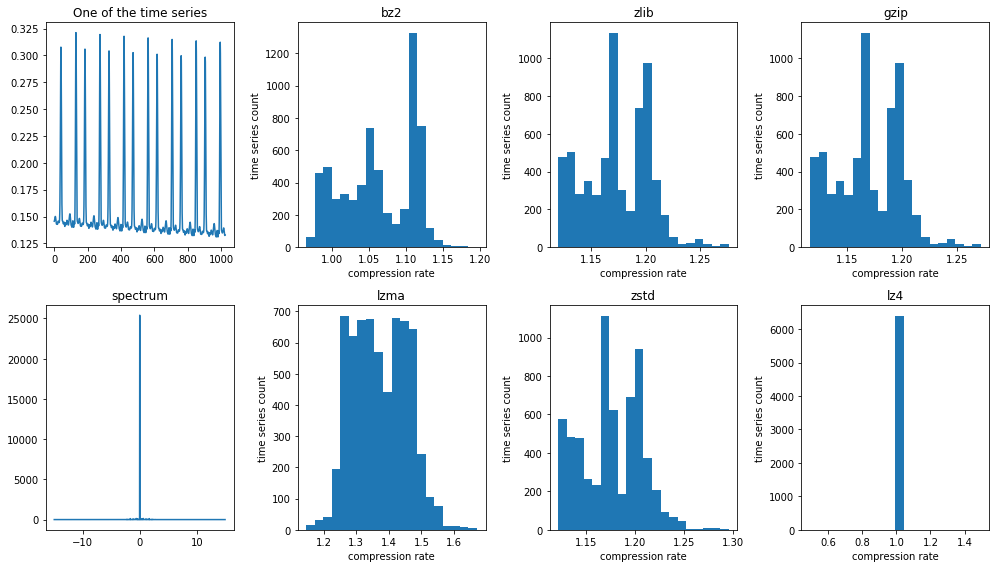

In [168]:
compression_rate_distribution(test, 1)